In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as nsn  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv("Mother.txt")
df = df.drop_duplicates()
print(df.head())

  Mother\tChild
0    67.0\t73.2
1    67.0\t73.5
2    67.0\t72.5
3    67.0\t71.0
4    66.5\t70.5


In [8]:
new = df['Mother\tChild'].str.split('\t', expand = True)
new.columns = ['Mother', 'Child']
new

,Mother,Child
0,67.0,73.2
1,67.0,73.5
2,67.0,72.5
3,67.0,71.0
4,66.5,70.5
...,...,...
241,66.0,70.5
242,66.0,64.5
243,66.0,64.0
244,66.0,68.5


In [9]:
new_1 = new.copy().astype(float)
mean=new_1.mean()
std_dev=new_1.std()
print(mean)
print(std_dev)

Mother    64.556504
Child     69.128862
dtype: float64
Mother    2.578834
Child     3.007749
dtype: float64


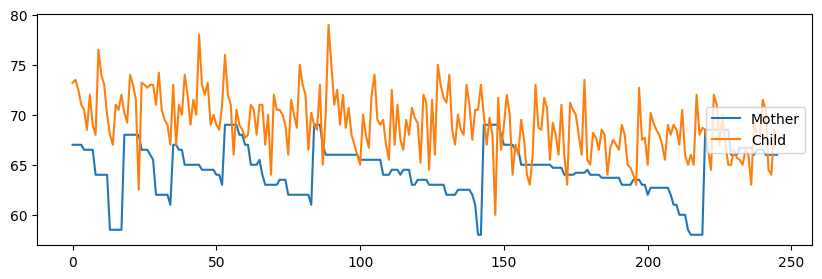

In [10]:
plt.figure(figsize=(10,3))
plt.plot(new_1)
plt.legend(['Mother', 'Child','Result'], loc='right')

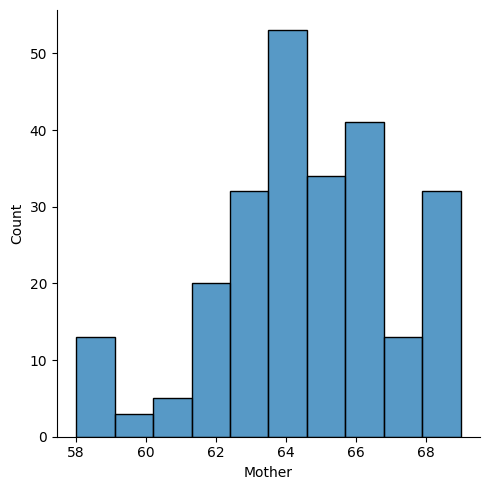

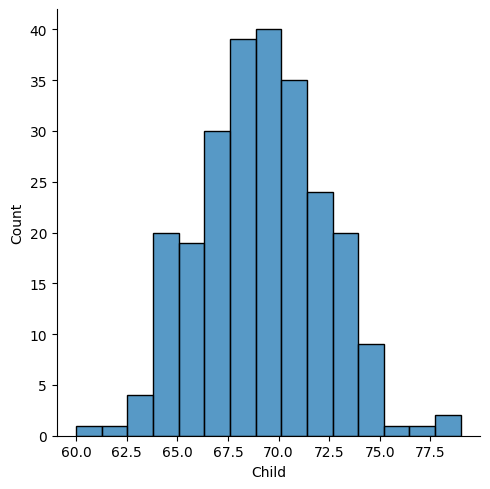

In [11]:
nsn.displot(new_1['Mother'])
nsn.displot(new_1['Child'])

<function matplotlib.pyplot.show(close=None, block=None)>

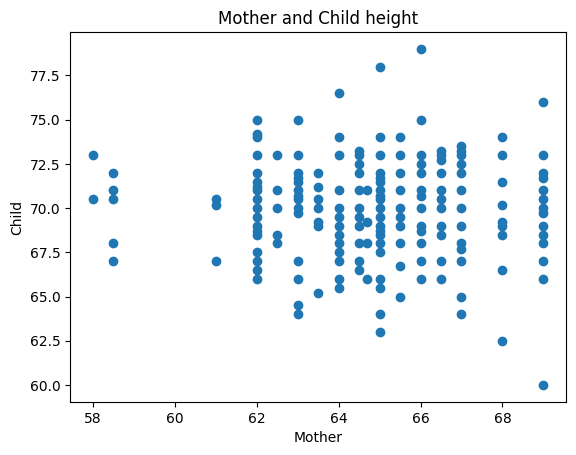

In [12]:
#visulize 
data = np.loadtxt('Mother.txt', delimiter='\t', skiprows=1)

num_samples = int(0.7 * len(data))
data = data[:num_samples]

fig, ax = plt.subplots()

ax.scatter (data[:,0], data[:,1])
ax.set_xlabel('Mother')
ax.set_ylabel('Child')
ax.set_title('Mother and Child height')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

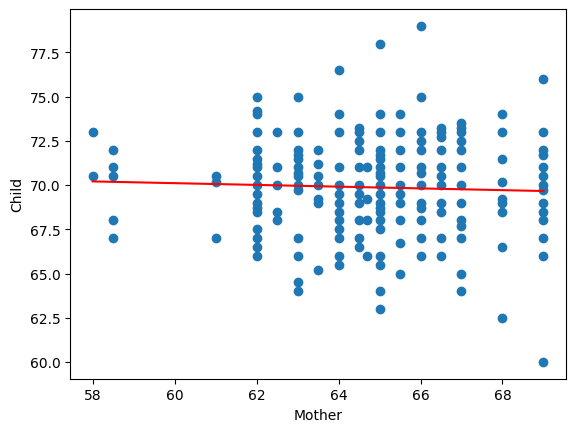

In [13]:
data = np.loadtxt('Mother.txt', delimiter='\t', skiprows= 1)

num_samples = int(0.7 * len(data))
data = data[:num_samples]

x = data[:,0]
y = data[:,1]

slope = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - np.mean(x)**2) 
intercept = np.mean(y) - slope*np.mean(x)

x0 = np.array([min(x), max(x)])
y0 = intercept + slope*x0

plt.scatter(x, y)
plt.plot(x0, y0, c='red')

plt.xlabel('Mother')
plt.ylabel('Child')

plt.show

In [27]:
x_new = np.array([66, 58])
y_pred = intercept + x_new*slope
print(y_pred)

[67.33563474 67.59577584]


In [30]:
data = np.loadtxt('Mother.txt', delimiter='\t', skiprows=1)

num_samples = int(0.7 * len(data))
train_data = data[:num_samples]

num_test = int(0.3*len(data))
test_data = data[num_samples:]

x_test = test_data[:,0]
y_test = test_data[:,1]

slope = (np.mean(x_test*y_test) - np.mean(x_test)*np.mean(y_test)) / (np.mean(x_test**2) - np.mean(x_test)**2) 
intercept = np.mean(y_test) - slope*np.mean(x_test)

x_new2 = np.array([65.8, 58])
y_test = intercept + slope*x_new2
print(y_test)

[67.34213827 67.59577584]


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results  
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.0032517636787616766
Mean Squared Error (MSE): 2.1147934045027344e-05
Root Mean Squared Error (RMSE): 0.004598688296136991
R-squared (R^2): 0.9986850756081527
